# **Wine Quality Dataset - Decision Tree Classifier**

 -  The Wine Quality dataset contains physicochemical properties of different red wines, along with a target variable
 -  representing the wine quality score (1-10). The goal is to predict the wine quality based on the given features.



# Features:
 -  1. Fixed Acidity: Tartaric acid in g/dm³ (affects sourness).
 -  2. Volatile Acidity: Acetic acid in g/dm³ (higher levels lead to unpleasant taste).
 -  3. Citric Acid: Citric acid in g/dm³ (adds freshness and acts as a preservative).
 -  4. Residual Sugar: Sugar left after fermentation in g/dm³ (affects sweetness).
 -  5. Chlorides: Salt content in g/dm³ (affects wine taste and preservation).
 -  6. Free Sulfur Dioxide: Unbound SO₂ in mg/dm³ (prevents spoilage).
 -  7. Total Sulfur Dioxide: Total SO₂ in mg/dm³ (affects taste and shelf life).
 -  8. Density: Density of wine in g/cm³ (related to alcohol and sugar).
 -  9. pH: Acidity/alkalinity of wine (lower values indicate higher acidity).
 -  10. Sulphates: Potassium sulphate in g/dm³ (acts as a preservative and antioxidant).
 -  11. Alcohol: Alcohol content in % by volume.

# Target:
 -  - Quality: The wine quality score (1-10), with most wines rated between 3 and 8.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Step 1: Import Libraries and Load the Dataset


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



In [3]:
# Load the dataset
url = "/content/drive/MyDrive/0.Latest_DS_Course/SL/Data/winequality-red.csv"
wine_data = pd.read_csv(url)


##Data Inspection

In [4]:
# Display the first few rows of the dataset
display(wine_data.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.shape

(1599, 12)

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Cleaning:

In [8]:
# Checking for missing values
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
wine_data.duplicated().sum()

np.int64(240)

In [10]:
wine_data.drop_duplicates(inplace=True)

## Check data distribution

<Axes: xlabel='quality', ylabel='count'>

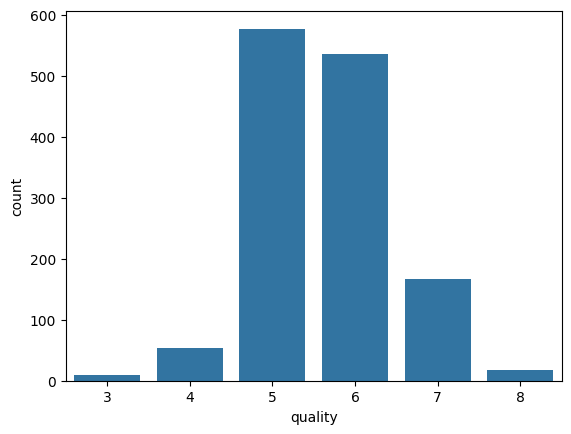

In [11]:
sns.countplot(data=wine_data, x="quality")

In [12]:
wine_data['quality'].value_counts(normalize=True)

,proportion
quality,
5,0.424577
6,0.393672
7,0.122884
4,0.038999
8,0.012509
3,0.007358


In [13]:
wine_data.to_csv("wine_data.csv")

##Univariate Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())



In [15]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

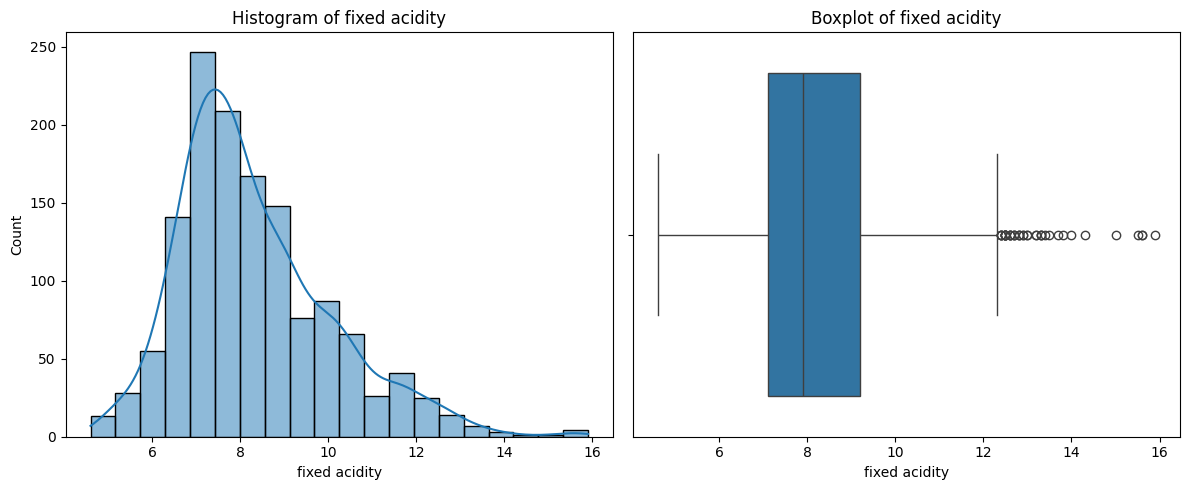

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64


In [16]:
histogram_boxplot(wine_data, "fixed acidity")

# Observations:
- most of the wines have fixed acidity in the range of 7 to 9

- distribution is right skewed with outliers on the right above 12

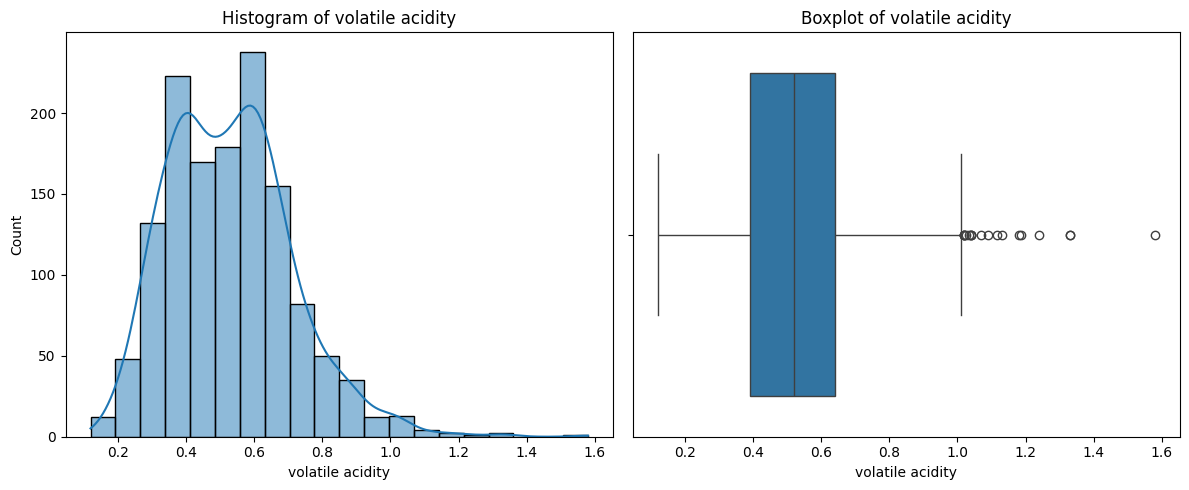

count    1359.000000
mean        0.529478
std         0.183031
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64


In [17]:
histogram_boxplot(wine_data, "volatile acidity")

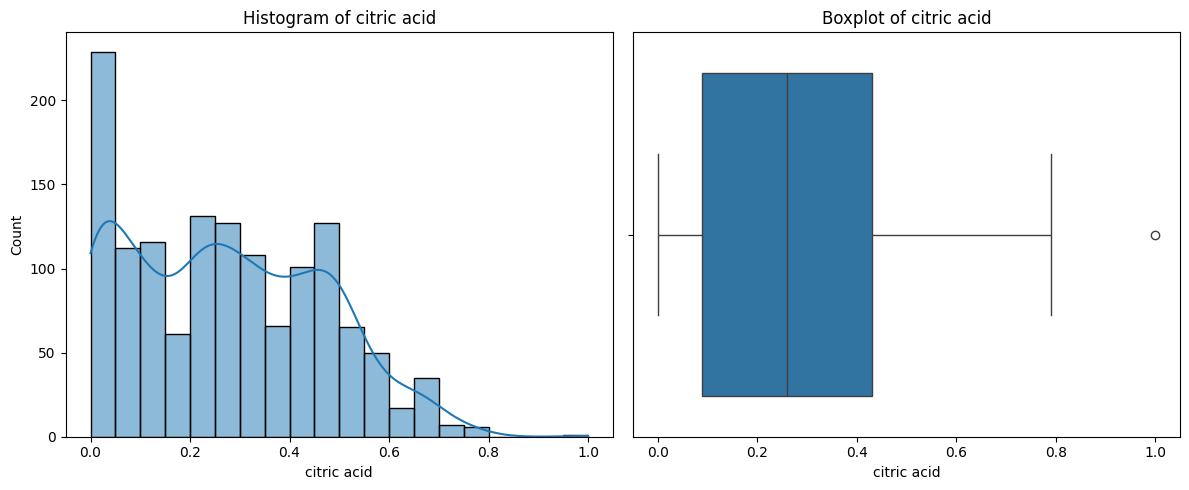

count    1359.000000
mean        0.272333
std         0.195537
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64


In [18]:
histogram_boxplot(wine_data, "citric acid")

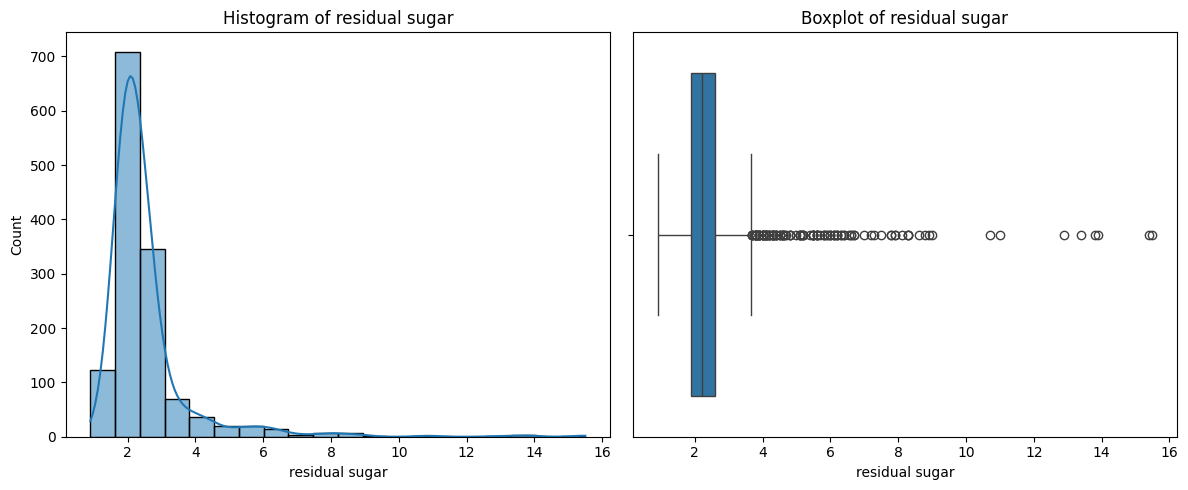

count    1359.000000
mean        2.523400
std         1.352314
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


In [19]:
histogram_boxplot(wine_data, "residual sugar")

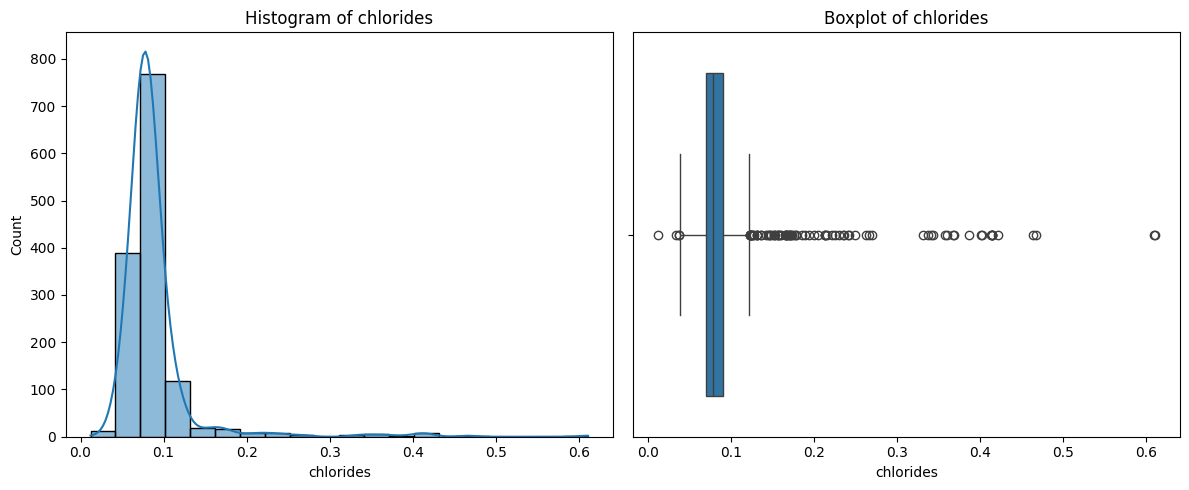

count    1359.000000
mean        0.088124
std         0.049377
min         0.012000
25%         0.070000
50%         0.079000
75%         0.091000
max         0.611000
Name: chlorides, dtype: float64


In [20]:
histogram_boxplot(wine_data, "chlorides")

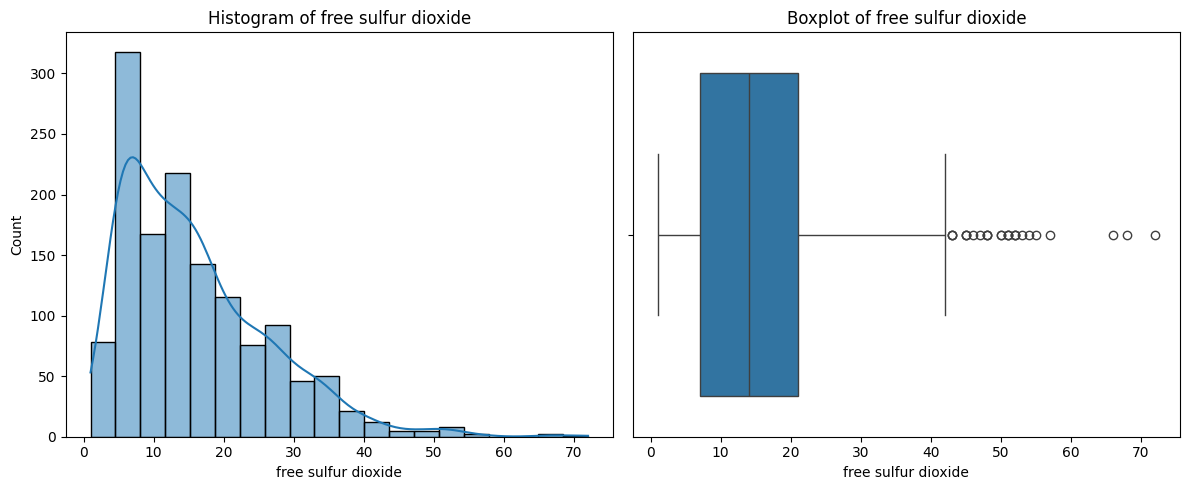

count    1359.000000
mean       15.893304
std        10.447270
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64


In [21]:
histogram_boxplot(wine_data, "free sulfur dioxide")

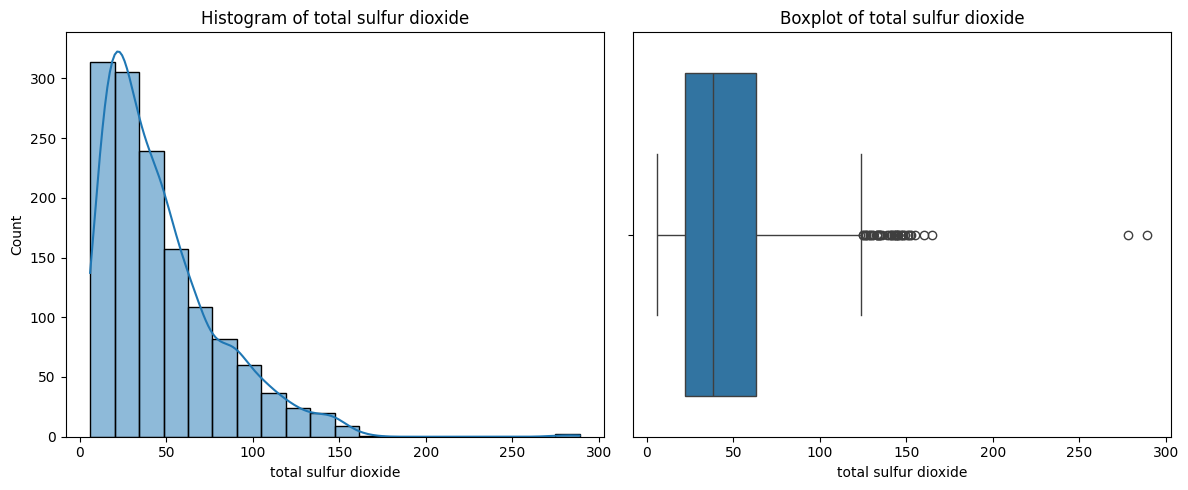

count    1359.000000
mean       46.825975
std        33.408946
min         6.000000
25%        22.000000
50%        38.000000
75%        63.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64


In [22]:
histogram_boxplot(wine_data, "total sulfur dioxide")

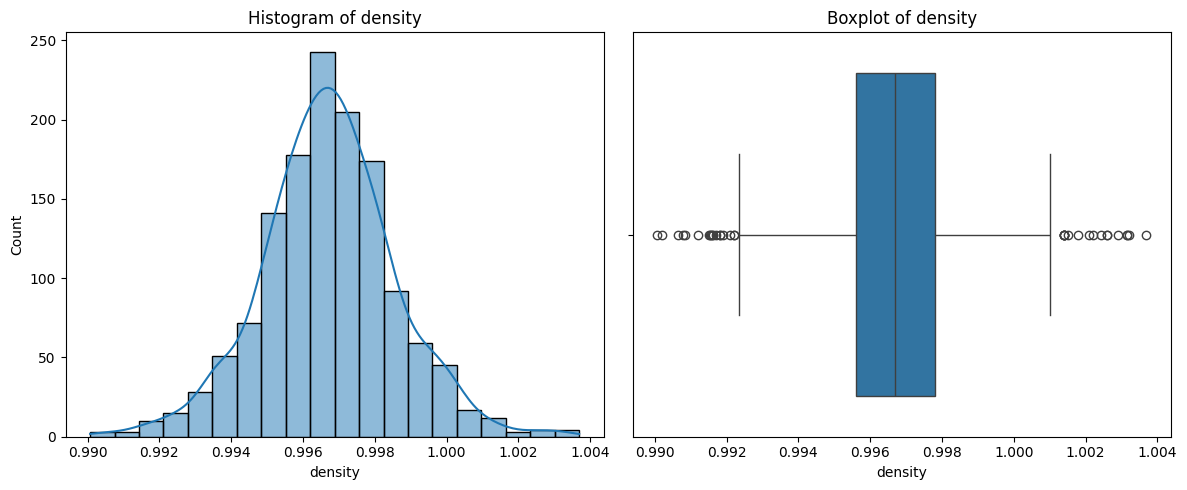

count    1359.000000
mean        0.996709
std         0.001869
min         0.990070
25%         0.995600
50%         0.996700
75%         0.997820
max         1.003690
Name: density, dtype: float64


In [23]:
histogram_boxplot(wine_data, "density")

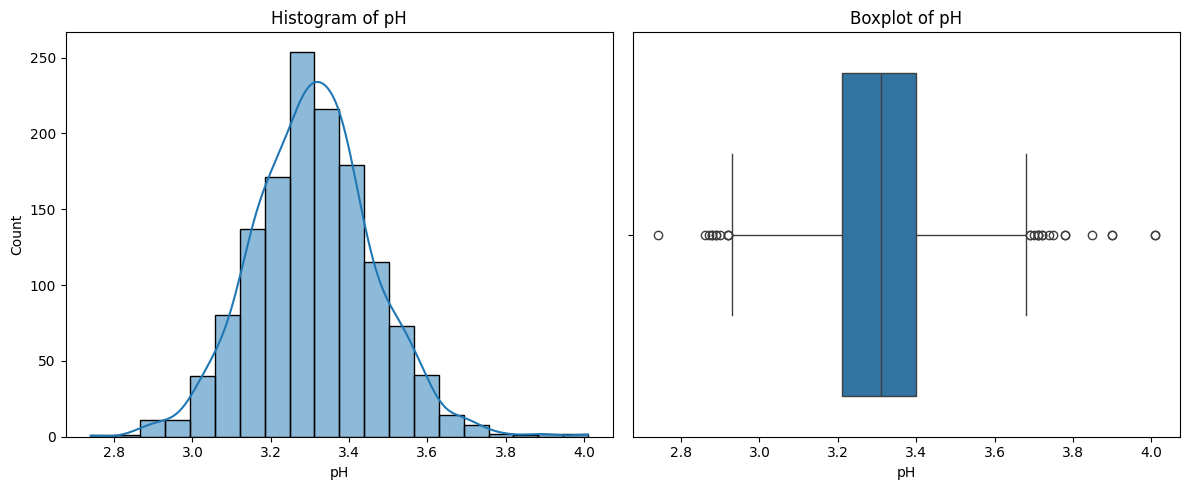

count    1359.000000
mean        3.309787
std         0.155036
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64


In [24]:
histogram_boxplot(wine_data, "pH")

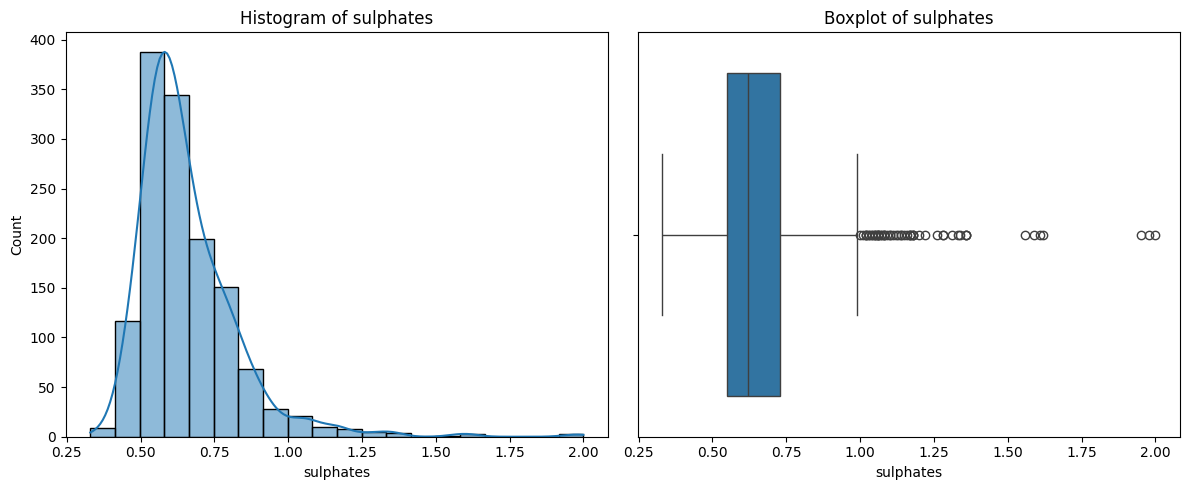

count    1359.000000
mean        0.658705
std         0.170667
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64


In [25]:
histogram_boxplot(wine_data, "sulphates")

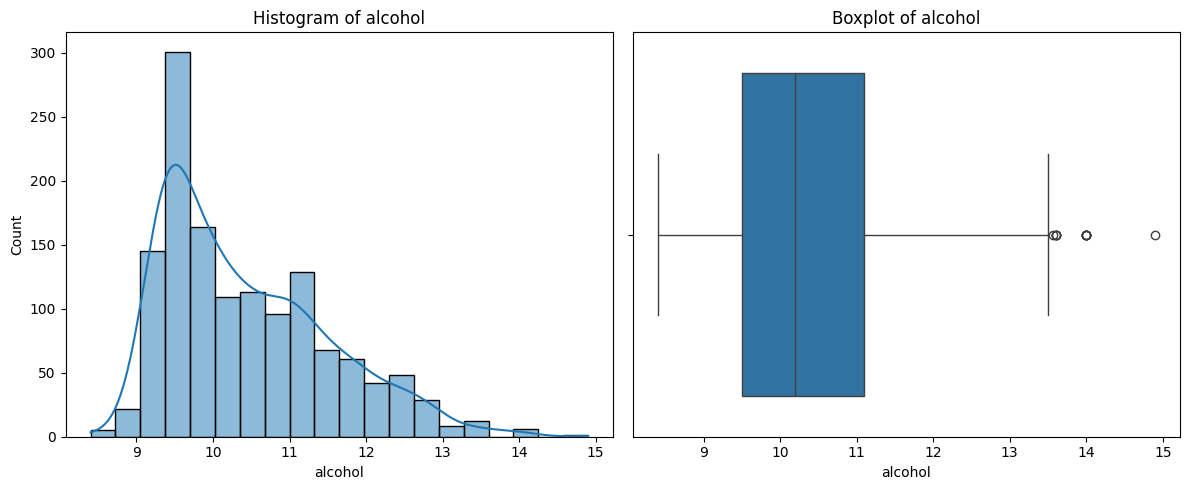

count    1359.000000
mean       10.432315
std         1.082065
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


In [26]:
histogram_boxplot(wine_data, "alcohol")

##Bivariate Analysis

In [27]:



def plot_boxplot_with_avg_bar(df, column, target='quality'):
    """
    Plots a boxplot and a bar chart showing the average of a numerical column for each category of the target.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to analyze.
        target (str): The categorical column (default is 'quality').
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Boxplot
    sns.boxplot(ax=axes[0], x=df[target], y=df[column])
    axes[0].set_title(f"Boxplot of {column} vs {target}")
    axes[0].set_xlabel(target)
    axes[0].set_ylabel(column)

    # Barplot (showing mean)
    mean_values = df.groupby(target)[column].mean().reset_index()
    sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")
    axes[1].set_title(f"Average {column} per {target}")
    axes[1].set_xlabel(target)
    axes[1].set_ylabel(f"Average {column}")

    plt.tight_layout()
    plt.show()



In [28]:
def plot_strip_or_swarm(df, column, target='quality', kind='swarm'):
    plt.figure(figsize=(8, 5))
    if kind == 'swarm':
        sns.swarmplot(x=target, y=column, data=df, size=3)
    else:
        sns.stripplot(x=target, y=column, data=df, jitter=True)
    plt.title(f'{kind.capitalize()} Plot of {column} vs {target}')
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

In [29]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


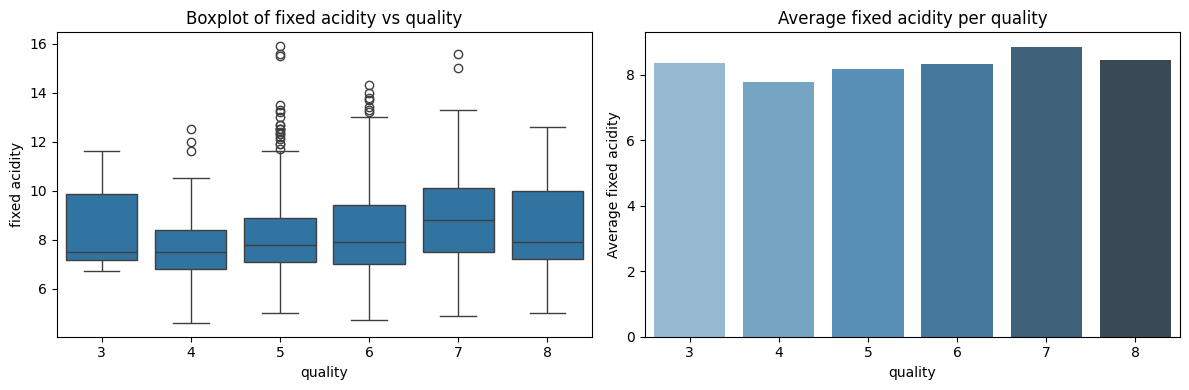

In [30]:
plot_boxplot_with_avg_bar(wine_data, 'fixed acidity')

Observations

---

###  **Boxplot (fixed acidity vs quality):**
- Median fixed acidity is **fairly stable** across qualities, with slight increase for quality 7.
- Quality 5 and 6 show **more outliers** and wider spread.
- Quality 3 has **higher median** than quality 4, which is a bit unusual.

---

###  **Bar Chart (Average fixed acidity per quality):**
- Average fixed acidity is **lowest at quality 4**.
- It **increases slightly** from quality 5 to 7.
- Quality 8 sees a **drop** in average fixed acidity.

---

###  **Conclusion:**
- Fixed acidity does **not show a strong trend** with wine quality.
- Slight **increase up to quality 7**, but not consistent.
- May have **limited predictive power** for quality alone.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


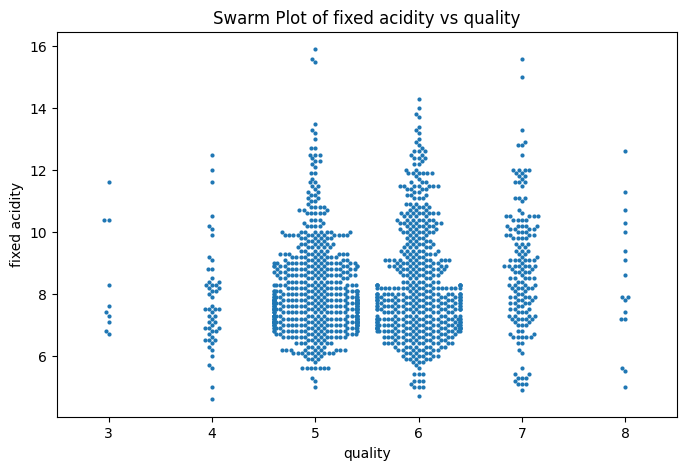

In [31]:
plot_strip_or_swarm(wine_data, 'fixed acidity')

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


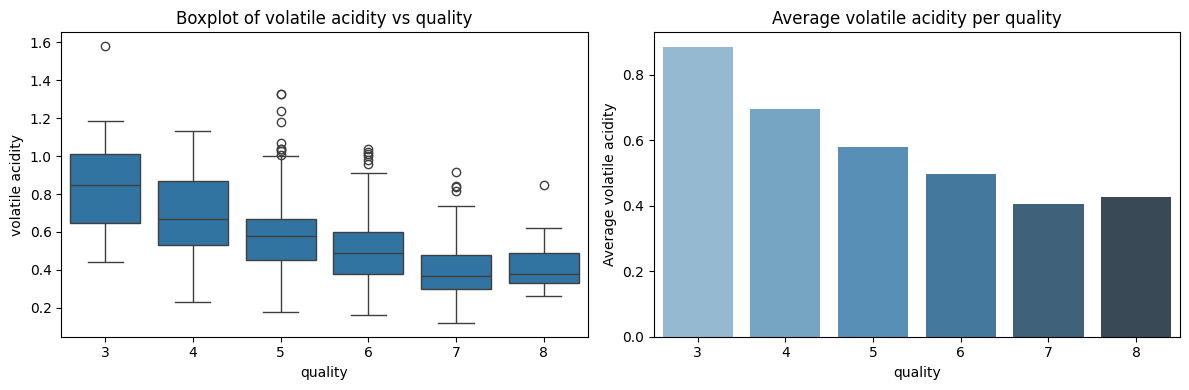

In [32]:
plot_boxplot_with_avg_bar(wine_data, 'volatile acidity')

Observations:
---

###  **Boxplot (volatile acidity vs quality):**
- Volatile acidity **decreases as quality increases**.
- Higher qualities (7, 8) have **lower median and less spread**.
- Quality 3 and 4 show **higher volatility and more outliers**.

---

###  **Bar Chart (Average volatile acidity per quality):**
- There is a **clear decreasing trend** in average volatile acidity from quality 3 to 7.
- Slight **uptick at quality 8**, but still lower than lower-quality wines.
- Suggests **inverse relationship** between volatile acidity and quality.

---

###  **Conclusion:**
- Volatile acidity is **negatively correlated** with wine quality.
- **Lower values** are associated with **better quality** wines.
- It may serve as a **useful predictor** in wine quality modeling.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


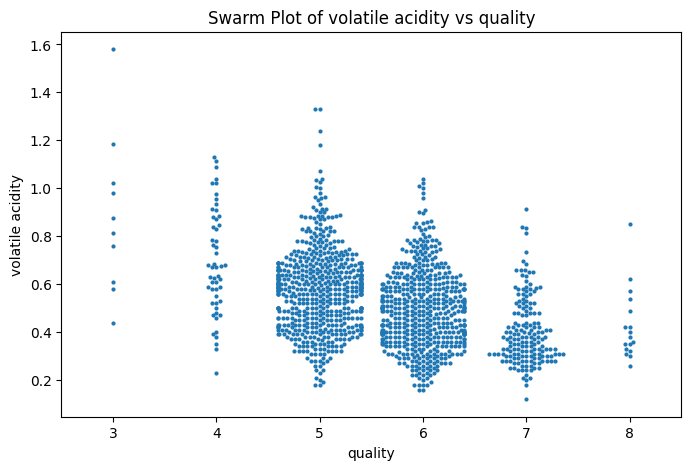

In [33]:
plot_strip_or_swarm(wine_data, 'volatile acidity')

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


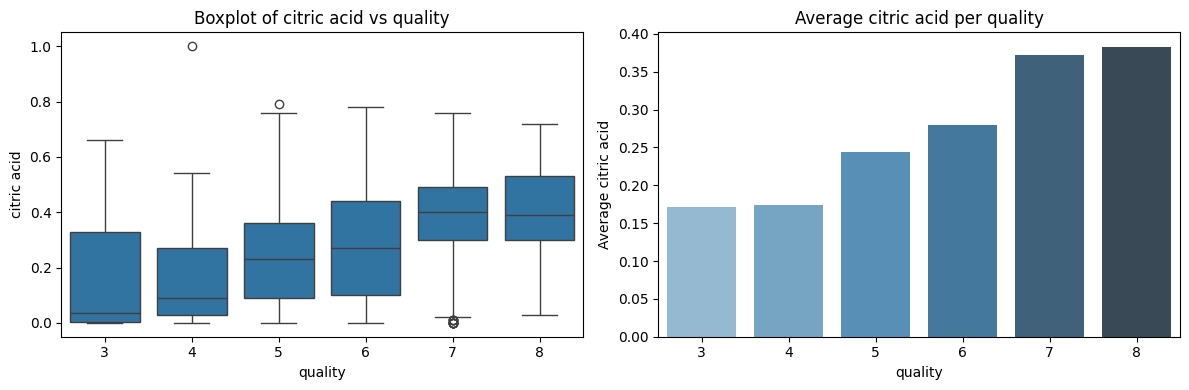

In [34]:
plot_boxplot_with_avg_bar(wine_data, 'citric acid')

Observations:

---

###  **Boxplot (citric acid vs quality):**
- Median citric acid **increases with quality**, especially from 5 onwards.
- Higher-quality wines (7, 8) have **higher and tighter interquartile ranges**.
- Low-quality wines (3, 4) have **lower medians and more variability**.

---

###  **Bar Chart (Average citric acid per quality):**
- Average citric acid shows a **steady increase** with quality.
- Sharpest rise is between **quality 5 to 7**.
- Quality 8 has the **highest average citric acid**.

---

###  **Conclusion:**
- Citric acid is **positively correlated** with wine quality.
- Higher-quality wines tend to have **more citric acid**.
- Citric acid may be a **useful quality indicator** in modeling.

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


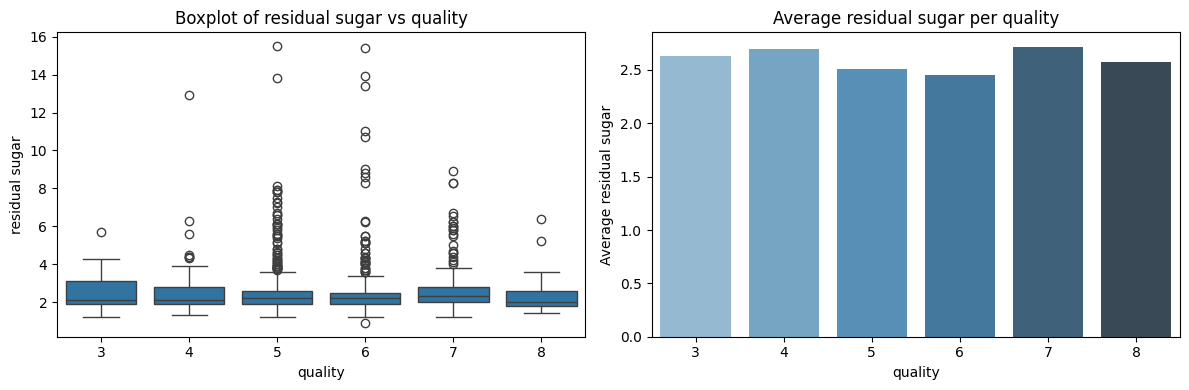

In [35]:
plot_boxplot_with_avg_bar(wine_data, 'residual sugar')

 observations and conclusion for the residual sugar vs wine quality plots:

---

###  **Boxplot (residual sugar vs quality):**
- Median residual sugar is **fairly consistent** across all quality levels.
- Distributions are **right-skewed** with many outliers, especially in mid-range quality (5–7).
- No strong visual trend linking residual sugar to increasing quality.

---

###  **Bar Chart (Average residual sugar per quality):**
- Average residual sugar values **fluctuate slightly** between quality levels.
- No clear upward or downward trend with quality.
- Highest average appears for **quality 4 and 7**, but difference is minimal.

---

### **Conclusion:**
- Residual sugar shows **no strong correlation** with wine quality.
- It may not be a **key factor** influencing quality scores.
- Further analysis may be needed with other features to understand its impact.

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


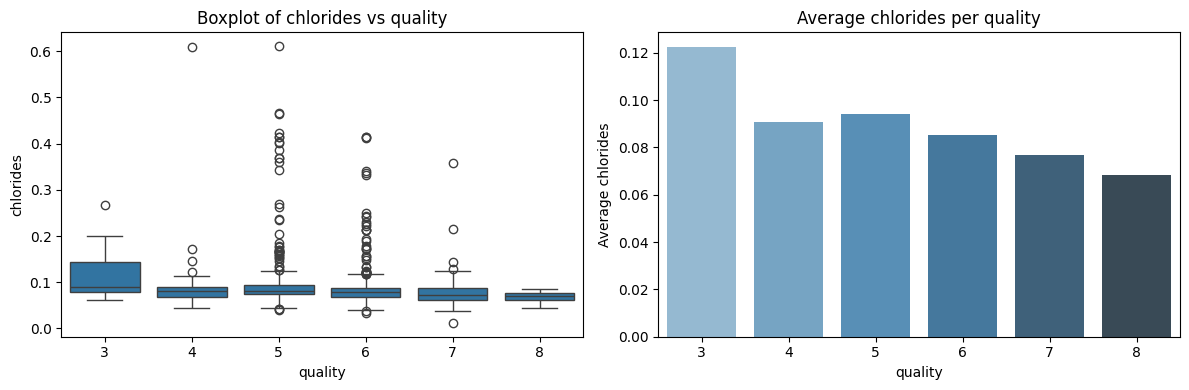

In [36]:
plot_boxplot_with_avg_bar(wine_data, 'chlorides')

Observations:

###  Boxplot of Chlorides vs Quality:


1. The median chloride level decreases as the quality rating improves, indicating a potential negative relationship between chlorides and quality.


### Average Chlorides per Quality (Bar Chart):
1. The bar chart shows a clear trend: average chloride levels decline progressively as the quality ratings increase from 3 to 8.


### Combined Insight:
Lower chloride levels seem to correspond with higher quality ratings, indicating that chlorides may negatively impact quality.


<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


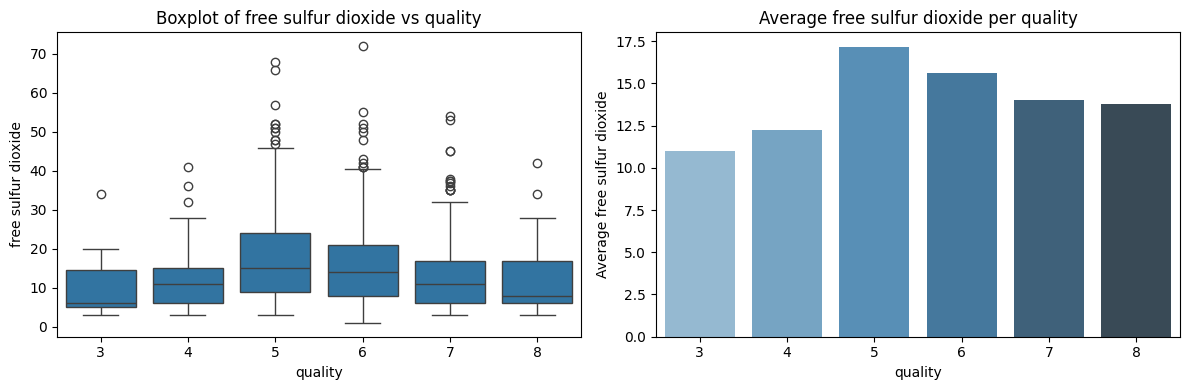

In [37]:
plot_boxplot_with_avg_bar(wine_data, 'free sulfur dioxide')



### Combined Insight:
The data suggests that free sulfur dioxide levels may not directly correlate with wine quality but tend to decrease in higher-quality ratings (6 to 8). However, quality rating 5 stands out with the highest average level.


<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


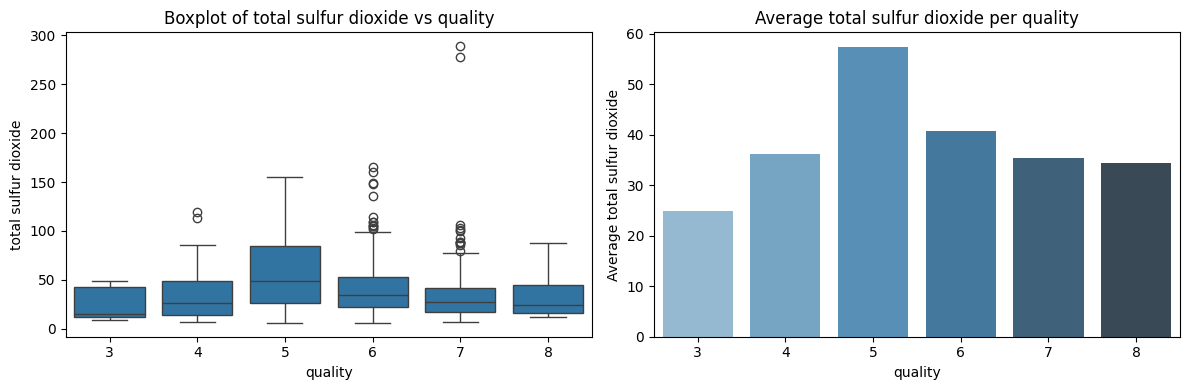

In [38]:
plot_boxplot_with_avg_bar(wine_data, 'total sulfur dioxide')


- **Trend**: Higher quality wines (ratings 7 and 8) tend to have lower total sulfur dioxide levels on average, indicating a potential negative correlation.
- **Exception**: Quality rating 5 stands out with its elevated sulfur dioxide levels, potentially due to production methods or other influencing factors.


<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


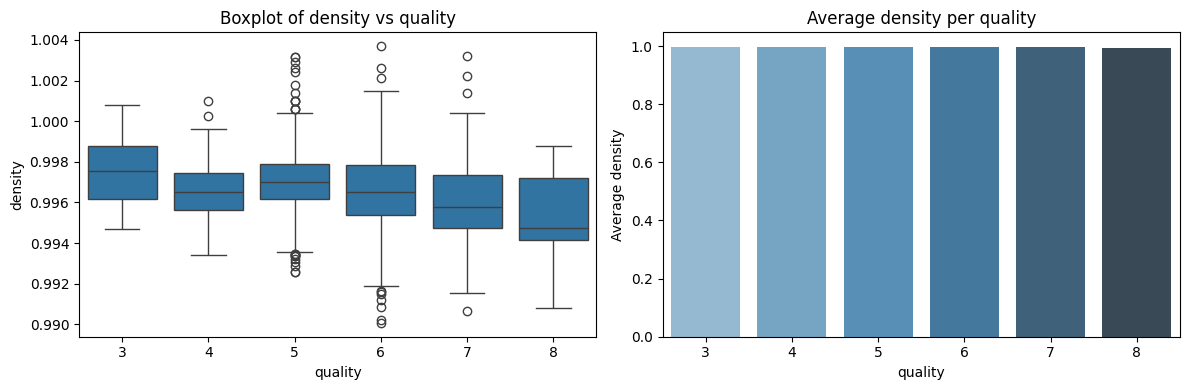

In [39]:
plot_boxplot_with_avg_bar(wine_data, 'density')

observations:

---

###  **Boxplot (density vs quality):**
- Median density slightly **decreases** with increasing quality.
- Quality 5–6 show **wider spread** and **more outliers**.
- Higher quality wines (7–8) have **tighter density ranges**.

---

###  **Bar Chart (Average density per quality):**
- **Consistent decrease** in average density as quality rises.
- Quality 3 has the **highest**, and 8 the **lowest** average density.
- Differences are **subtle** but show a **clear trend**.

---

###  **Conclusion:**
- **Negative correlation** observed between density and quality.
- Lower density generally indicates **better wine quality**.
- Density could be a **useful predictor** in quality modeling.

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


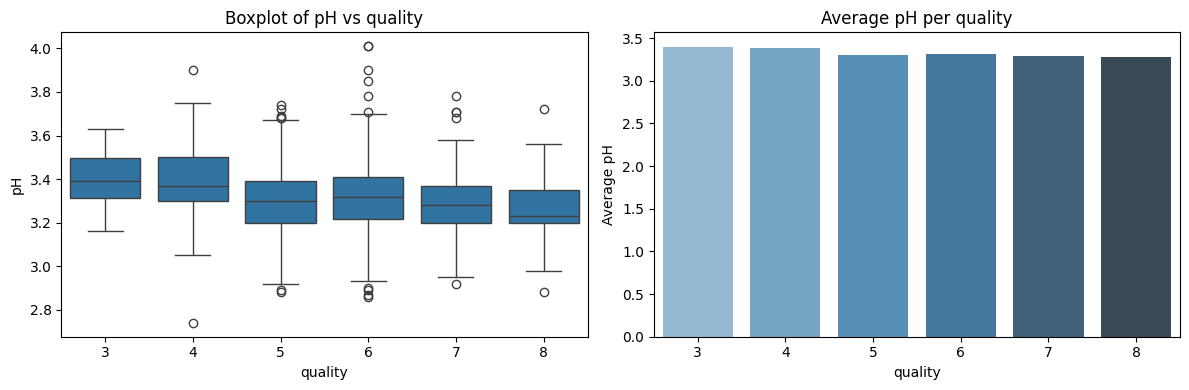

In [40]:
plot_boxplot_with_avg_bar(wine_data, 'pH')

while the bar chart hints at a slight negative trend, the magnitude of the difference in average pH is so small that it suggests at most a very weak negative correlation between pH and quality in this dataset

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


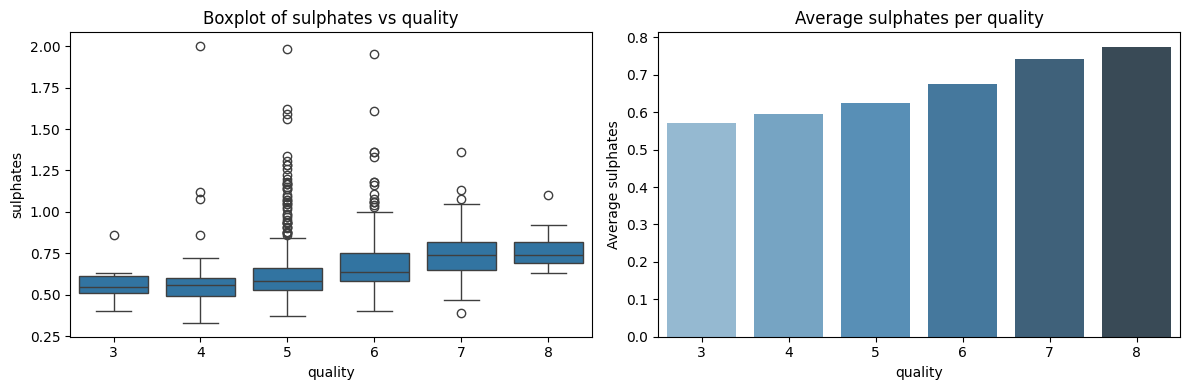

In [41]:
plot_boxplot_with_avg_bar(wine_data, 'sulphates')

* Positive Trend: Average sulphate levels generally increase with wine quality.
* Higher Sulphates in Better Wines: Higher quality wines tend to have higher average sulphate concentrations.
* Potential Quality Factor: Sulphate content appears to be a factor associated with higher wine quality.
* Variability Exists: Sulphate levels vary within each quality rating, indicating it's not the sole determinant.

<ipython-input-27-629693943>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=target, y=column, data=mean_values, palette="Blues_d")


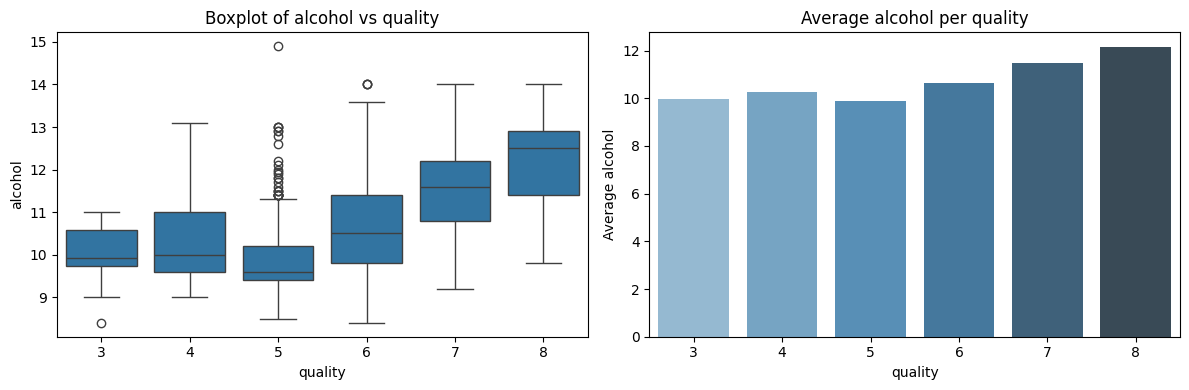

In [42]:
plot_boxplot_with_avg_bar(wine_data, 'alcohol')

* Alcohol Increases with Quality: Higher quality wines generally have higher alcohol content.
* Strong Positive Link: A clear positive correlation exists between alcohol level and quality rating.
* Potential Quality Indicator: Alcohol content appears to be a factor associated with better wine quality.


##Multivariate Analysis:

In [43]:

# Data visualization using pairplot
sns.pairplot(wine_data, diag_kind="kde", hue="quality", palette='Dark2')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

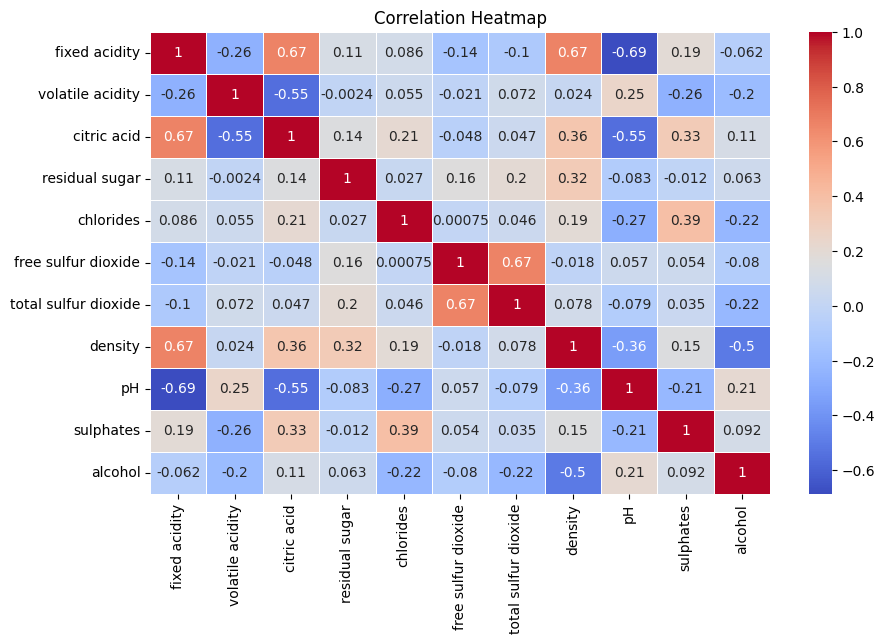

In [44]:
#  Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(wine_data.drop(['quality'], axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Here are some key observations from the correlation heatmap:

* **Strong Positive Correlations:**
    * **Fixed acidity and density (0.67):** Wines with higher fixed acidity tend to have higher density.
    * **Free sulfur dioxide and total sulfur dioxide (0.67):** These two sulfur dioxide measures are strongly positively correlated, as expected.
    * **Citric acid and fixed acidity (0.67):** Wines with higher fixed acidity tend to have higher citric acid content.

* **Strong Negative Correlations:**
    * **pH and fixed acidity (-0.69):** Higher fixed acidity is associated with lower pH (more acidic).
    * **Citric acid and volatile acidity (-0.55):** Higher citric acid tends to be associated with lower volatile acidity.
    * **Density and alcohol (-0.5):** Higher density tends to be associated with lower alcohol content.

* **Moderate Positive Correlations:**
    * **Alcohol and quality (0.21):** There's a moderate positive correlation, suggesting higher alcohol content is somewhat associated with higher quality.
    * **Sulphates and quality (0.39):** Sulphate levels show a moderate positive correlation with quality.
    * **Citric acid and quality (0.33):** Higher citric acid is moderately associated with higher quality.

* **Moderate Negative Correlations:**
    * **Volatile acidity and quality (-0.26):** Higher volatile acidity is moderately associated with lower quality.
    * **pH and quality (-0.21):** Higher pH (less acidic) shows a moderate negative correlation with quality.

* **Weak Correlations (close to zero):**
    * Many pairs of variables show very weak correlations (values close to 0), indicating little to no linear relationship. Examples include residual sugar with pH (-0.083) and alcohol (-0.062), chlorides with quality (-0.22), and free sulfur dioxide with density (-0.018).




In [45]:
import pandas as pd

def print_correlated_pairs_in_range(df, lower_bound=0.5, upper_bound=1.0):
    """
    Prints all unique pairs of columns whose absolute correlation values are within the specified range,
    sorted by absolute correlation value in descending order.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    lower_bound (float): Lower bound of the correlation range.
    upper_bound (float): Upper bound of the correlation range.
    """
    corr_matrix = df.corr()
    correlated_pairs = []

    printed = set()

    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                pair = tuple(sorted((col1, col2)))
                if pair not in printed:
                    corr_value = corr_matrix.loc[col1, col2]
                    abs_corr = abs(corr_value)
                    if lower_bound <= abs_corr <= upper_bound:
                        correlated_pairs.append((pair[0], pair[1], corr_value))
                        printed.add(pair)

    # Sort by absolute correlation value (descending)
    correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

    # Pretty print
    if correlated_pairs:
        print(f"{'Column 1':<20}{'Column 2':<20}{'Correlation':>12}")
        print("-" * 52)
        for col1, col2, corr_val in correlated_pairs:
            print(f"{col1:<20}{col2:<20}{corr_val:>12.2f}")
    else:
        print(f"No column pairs found with correlation between {lower_bound} and {upper_bound}.")


In [46]:
print_correlated_pairs_in_range(wine_data, 0.6, 1.0)

Column 1            Column 2             Correlation
----------------------------------------------------
fixed acidity       pH                         -0.69
density             fixed acidity               0.67
citric acid         fixed acidity               0.67
free sulfur dioxide total sulfur dioxide        0.67


In [47]:
print_correlated_pairs_in_range(wine_data, 0.3, 0.5)

Column 1            Column 2             Correlation
----------------------------------------------------
alcohol             quality                     0.48
quality             volatile acidity           -0.40
chlorides           sulphates                   0.39
citric acid         density                     0.36
density             pH                         -0.36
citric acid         sulphates                   0.33
density             residual sugar              0.32


##Fix Outliers and scale data

In [48]:
def cap_outliers_iqr(df, target_column):
    """
    Caps the outliers in numerical columns using the IQR method.

    Parameters:
        df (pd.DataFrame): Original DataFrame.
        target_column (str): Column to exclude from outlier treatment.

    Returns:
        pd.DataFrame: DataFrame with outliers capped.
    """
    df_capped = df.copy()
    numeric_cols = df.drop(columns=[target_column]).select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[col] = df[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )

    return df_capped


import pandas as pd
from sklearn.preprocessing import StandardScaler


def scale_features(df, target_column):
    """
    Scales the feature columns using StandardScaler.

    Parameters:
        df (pd.DataFrame): The cleaned dataset.
        target_column (str): Name of the target column.

    Returns:
        pd.DataFrame: Scaled features with target column included.
    """
    features = df.drop(columns=[target_column])
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(features)
    scaled_df = pd.DataFrame(scaled_array, columns=features.columns)
    scaled_df[target_column] = df[target_column].values
    return scaled_df





In [49]:

# Cap outliers
capped_wine_data = cap_outliers_iqr(wine_data, target_column='quality')

# Now you can scale it
scaled_capped_wine_data = scale_features(capped_wine_data, target_column='quality')


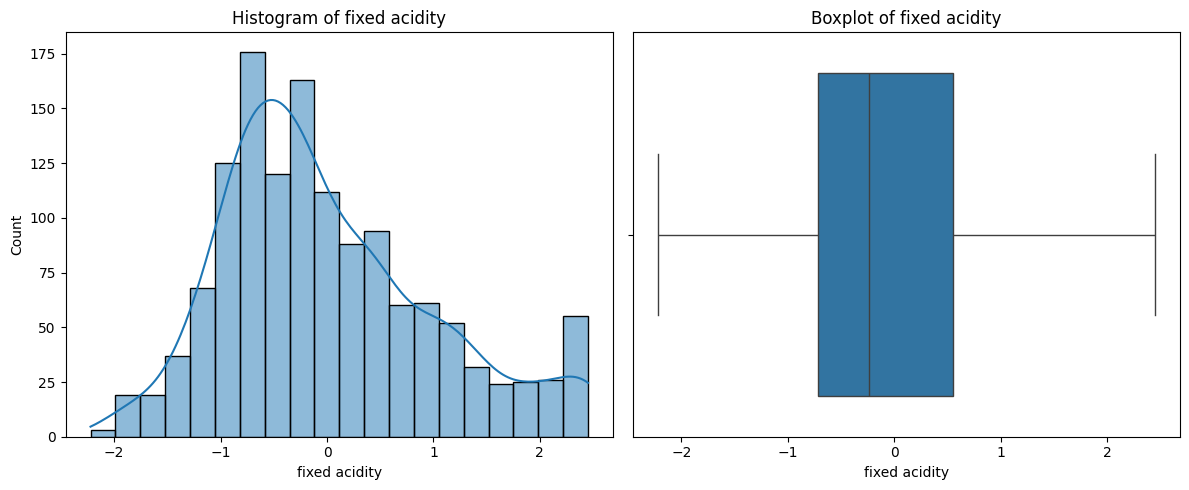

count    1.359000e+03
mean    -1.882232e-16
std      1.000368e+00
min     -2.222387e+00
25%     -7.142808e-01
50%     -2.316868e-01
75%      5.525284e-01
max      2.452742e+00
Name: fixed acidity, dtype: float64


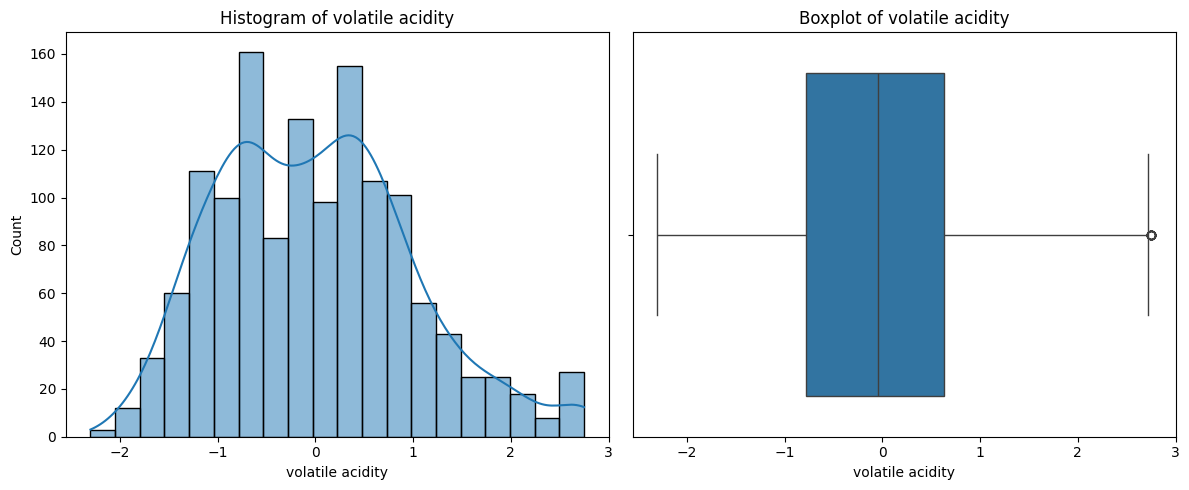

count    1.359000e+03
mean    -3.032486e-16
std      1.000368e+00
min     -2.301629e+00
25%     -7.778958e-01
50%     -4.424652e-02
75%      6.329682e-01
max      2.749264e+00
Name: volatile acidity, dtype: float64


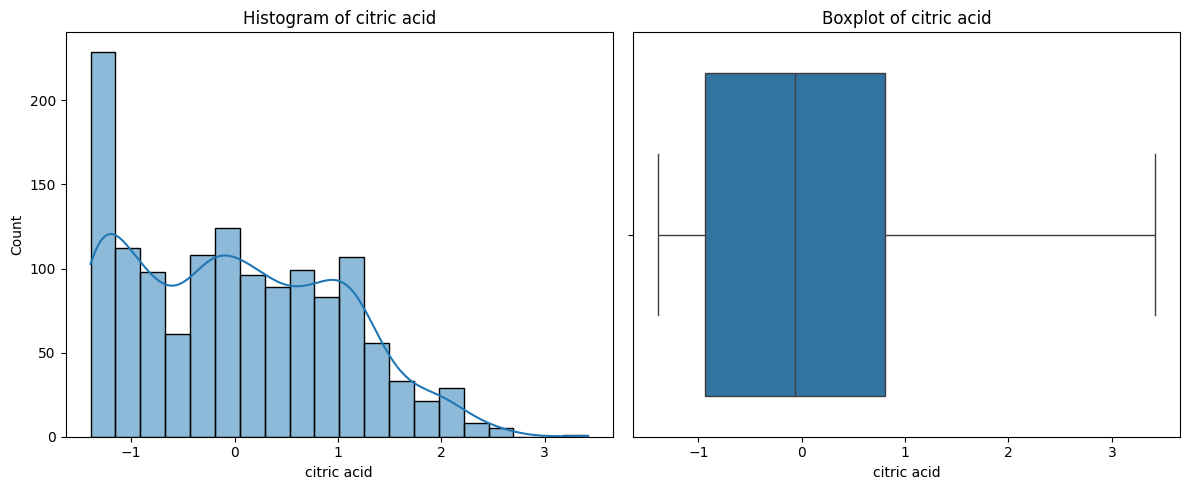

count    1.359000e+03
mean     7.319793e-17
std      1.000368e+00
min     -1.394157e+00
25%     -9.333434e-01
50%     -6.291864e-02
75%      8.075061e-01
max      3.418781e+00
Name: citric acid, dtype: float64


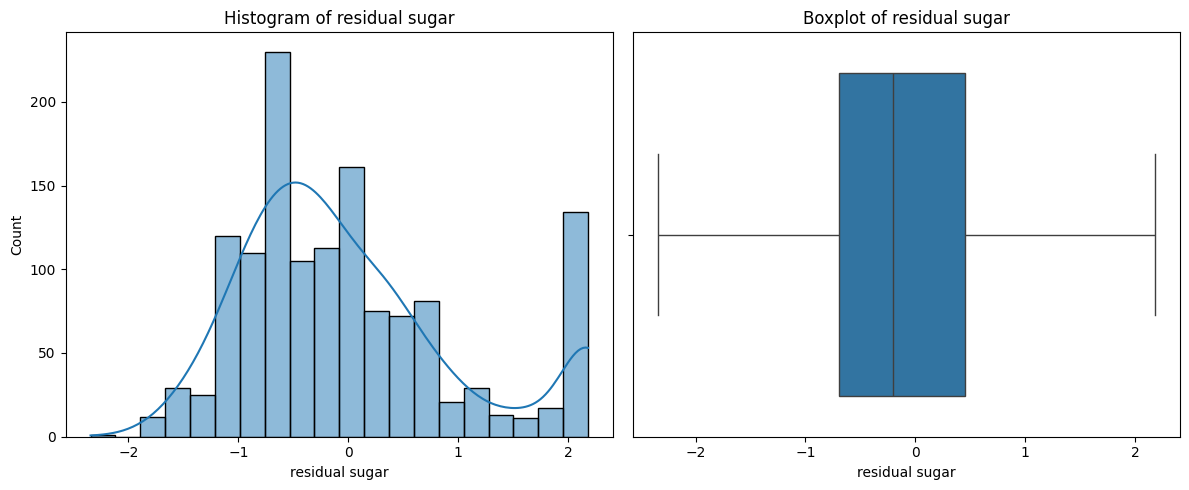

count    1.359000e+03
mean    -2.091369e-17
std      1.000368e+00
min     -2.344836e+00
25%     -6.982956e-01
50%     -2.043334e-01
75%      4.542829e-01
max      2.183151e+00
Name: residual sugar, dtype: float64


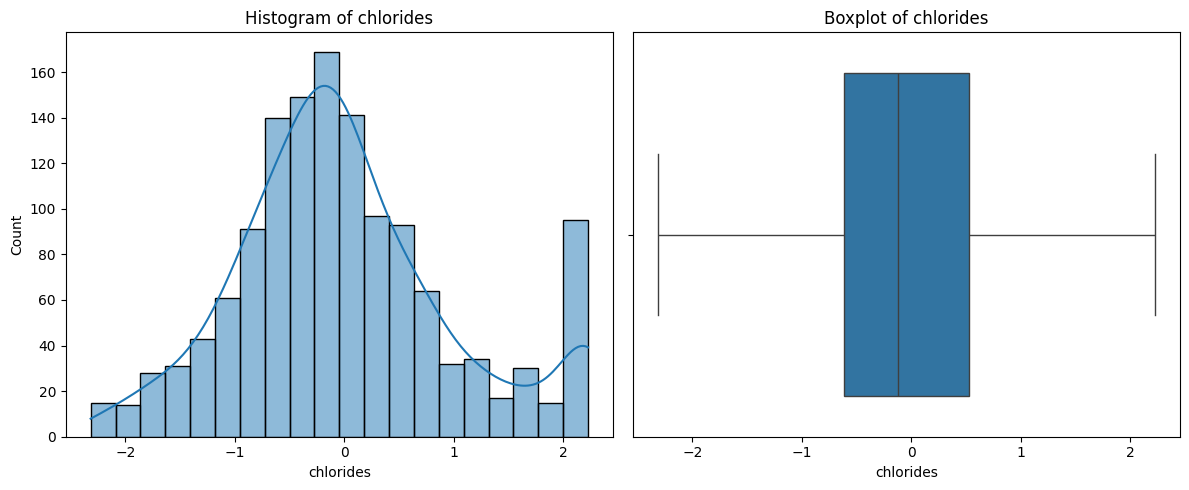

count    1.359000e+03
mean    -1.150253e-16
std      1.000368e+00
min     -2.317408e+00
25%     -6.127711e-01
50%     -1.257319e-01
75%      5.236538e-01
max      2.228291e+00
Name: chlorides, dtype: float64


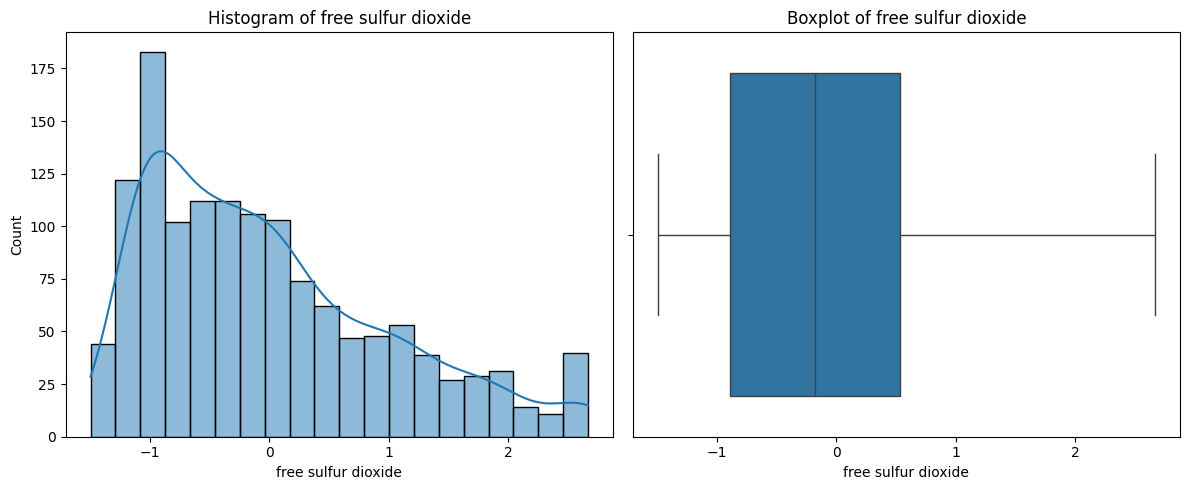

count    1.359000e+03
mean    -6.274108e-17
std      1.000368e+00
min     -1.494007e+00
25%     -8.848088e-01
50%     -1.740779e-01
75%      5.366530e-01
max      2.668846e+00
Name: free sulfur dioxide, dtype: float64


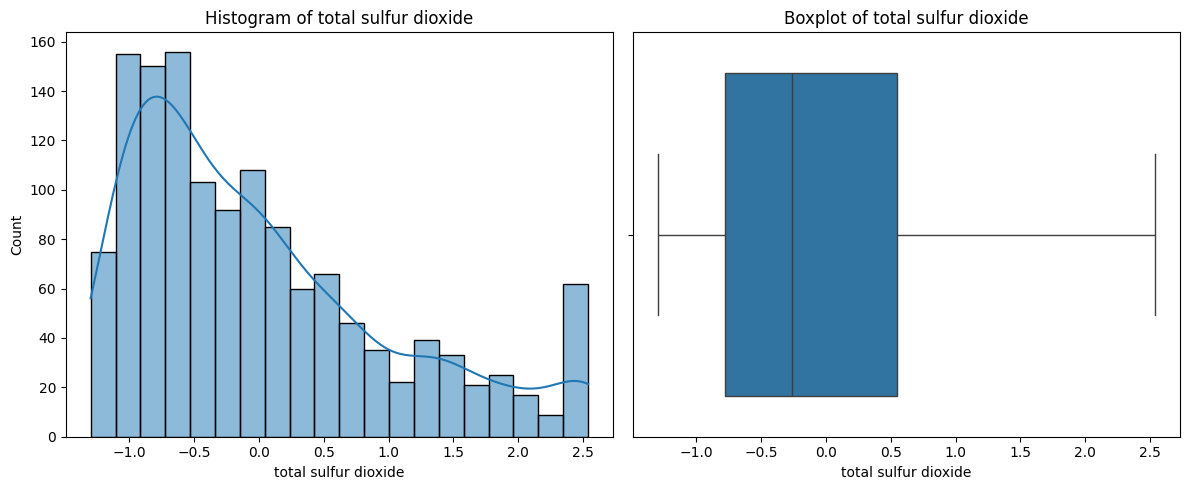

count    1.359000e+03
mean     7.319793e-17
std      1.000368e+00
min     -1.298902e+00
25%     -7.805424e-01
50%     -2.621833e-01
75%      5.477528e-01
max      2.540196e+00
Name: total sulfur dioxide, dtype: float64


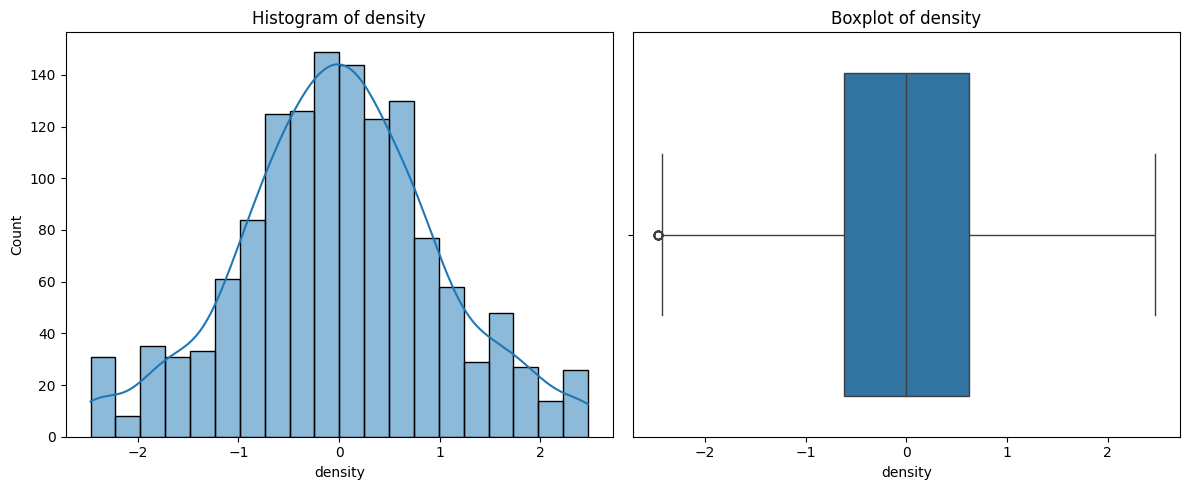

count    1.359000e+03
mean    -1.321745e-14
std      1.000368e+00
min     -2.469022e+00
25%     -6.158274e-01
50%     -3.660959e-03
75%      6.196358e-01
max      2.472831e+00
Name: density, dtype: float64


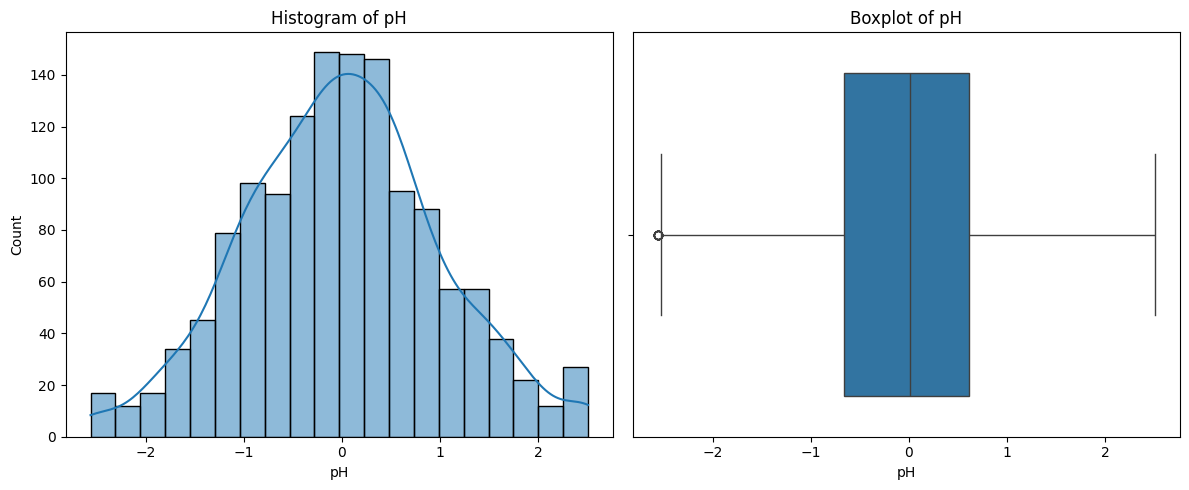

count    1.359000e+03
mean     7.110656e-16
std      1.000368e+00
min     -2.560515e+00
25%     -6.595827e-01
50%      7.411041e-03
75%      6.077054e-01
max      2.508637e+00
Name: pH, dtype: float64


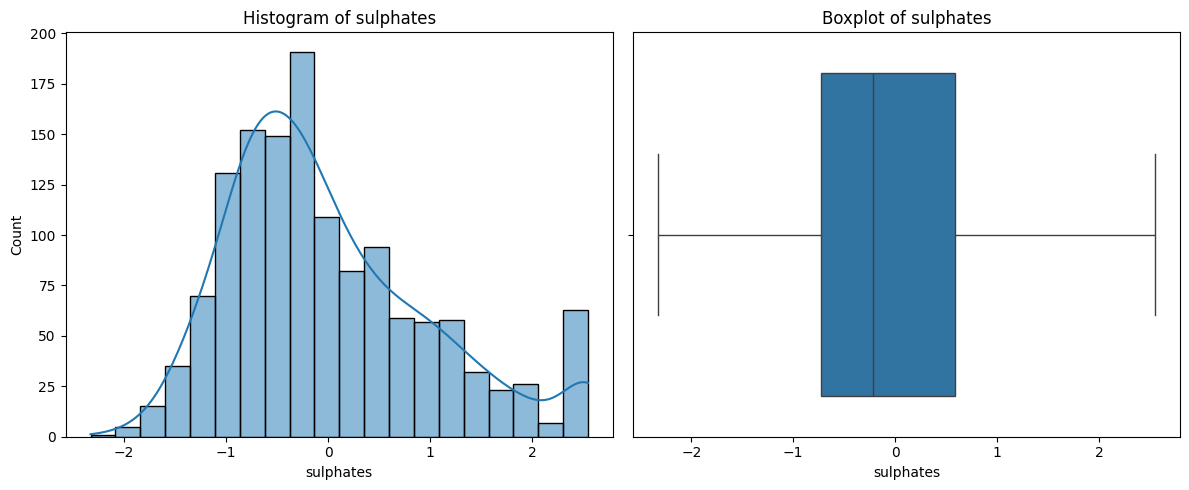

count    1.359000e+03
mean    -5.385276e-16
std      1.000368e+00
min     -2.329504e+00
25%     -7.277859e-01
50%     -2.181483e-01
75%      5.827109e-01
max      2.548456e+00
Name: sulphates, dtype: float64


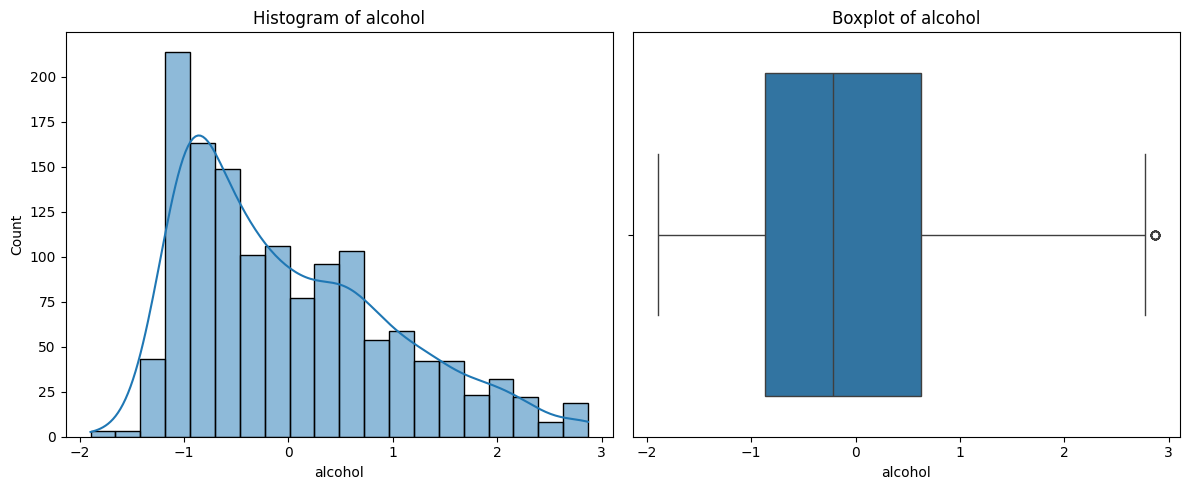

count    1.359000e+03
mean    -4.601013e-16
std      1.000368e+00
min     -1.895565e+00
25%     -8.677709e-01
50%     -2.137199e-01
75%      6.272028e-01
max      2.869663e+00
Name: alcohol, dtype: float64


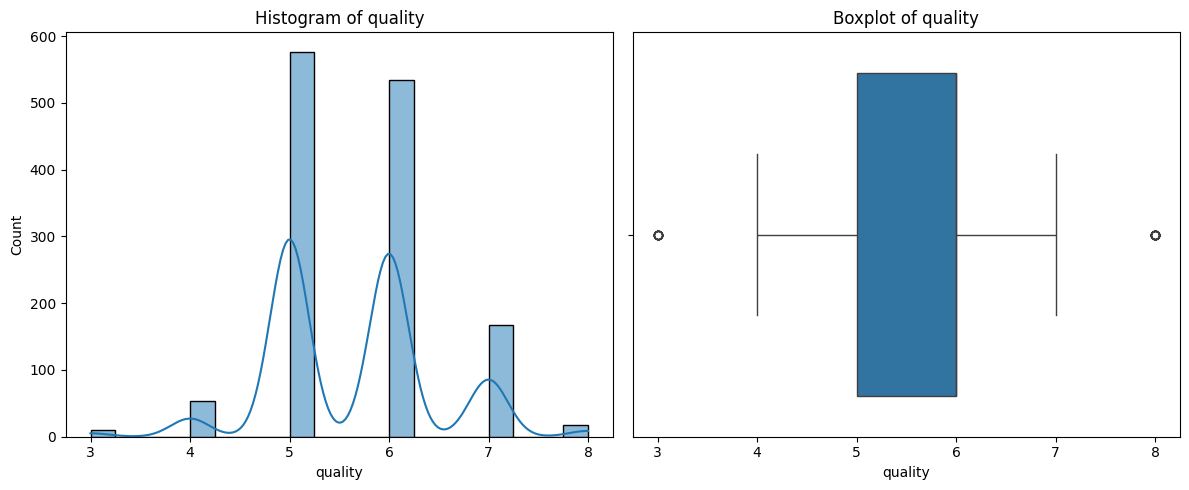

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [50]:
for col in scaled_capped_wine_data.columns:
    histogram_boxplot(scaled_capped_wine_data, col)

# Separate features and target

In [51]:

X_scaled = scaled_capped_wine_data.drop('quality', axis=1)  # Features
y_scaled = scaled_capped_wine_data['quality']  # Target: Wine quality score (1-10)


In [52]:
wine_data.shape

(1359, 12)

##Step 2: Split the Dataset into Training and Test Sets
 - We will use 80% of the data for training and 20% for testing.

In [53]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Check the shape of training and test sets
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (1087, 11), Test set size: (272, 11)


#Models without tuning

In [54]:

print("----- Without Hyperparameter Tuning -----\n")

models_no_tuning = {
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models_no_tuning.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


----- Without Hyperparameter Tuning -----

k-NN Accuracy: 0.5772
Naive Bayes Accuracy: 0.5919
SVM Accuracy: 0.6507
Decision Tree Accuracy: 0.4853


#Model Training with Extended GridSearchCV

In [55]:

# k-NN
knn_params = {
    'n_neighbors': list(range(1, 31)),
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [56]:

# SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    # 'kernel': ['linear', 'rbf', 'poly'],
    # 'degree': [2, 3, 4],
    # 'gamma': ['scale', 'auto'],
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]})

In [57]:

# Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [58]:

print("\n----- Final Evaluation with Tuned Models -----\n")

final_models = {
    "k-NN": knn_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_,
    "Decision Tree": dt_grid.best_estimator_,
}

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"Best Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("----------------------------")


----- Final Evaluation with Tuned Models -----


k-NN:
Best Test Accuracy: 0.6507
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.70      0.78      0.74       120
           6       0.58      0.67      0.62       103
           7       0.70      0.45      0.55        31
           8       0.00      0.00      0.00         3

    accuracy                           0.65       272
   macro avg       0.33      0.32      0.32       272
weighted avg       0.61      0.65      0.63       272

----------------------------

SVM:
Best Test Accuracy: 0.6507
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.71      0.75      0.73       120
           6       0.58      0.71      0.64       103
           7       0.70      0.45      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

#Feature Engineering

In [59]:
# Define the mapping
quality_mapping = {
    3: 1,
    4: 1,
    5: 2,
    6: 2,
    7: 3,
    8: 3
}

# Apply the mapping
wine_data['quality'] = wine_data['quality'].map(quality_mapping)


In [60]:
wine_data['quality'].value_counts().sort_index()


,count
quality,
1,63
2,1112
3,184


<Axes: xlabel='quality', ylabel='count'>

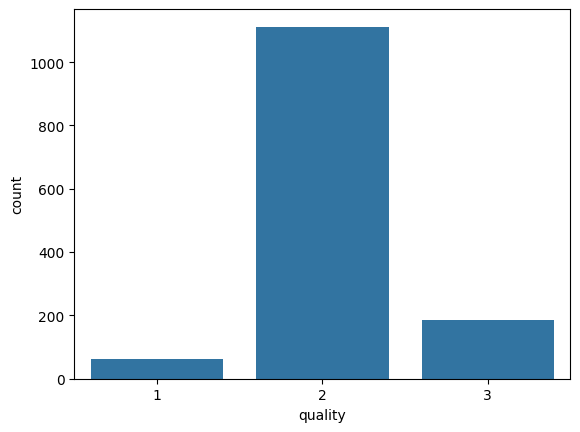

In [61]:
sns.countplot(data=wine_data, x='quality')

In [62]:


# Cap outliers
capped_wine_data = cap_outliers_iqr(wine_data, target_column='quality')

# Now you can scale it
scaled_capped_wine_data = scale_features(capped_wine_data, target_column='quality')


X = scaled_capped_wine_data.drop('quality', axis=1)  # Features
y = scaled_capped_wine_data['quality']  # Target: Wine quality score (1-10)


# Train-test splitting (3 target classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1087, 11), (272, 11), (1087,), (272,))

## Model without hyper parameter tuning

In [63]:


print("----- Without Hyperparameter Tuning -----\n")

models_no_tuning = {
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models_no_tuning.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")






----- Without Hyperparameter Tuning -----

k-NN Accuracy: 0.8235
Naive Bayes Accuracy: 0.8125
SVM Accuracy: 0.8566
Decision Tree Accuracy: 0.7684


## Model with Hyperparameter Tuning

In [64]:



# k-NN
knn_params = {
    'n_neighbors': list(range(1, 31)),
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)



# SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    # 'gamma': ['scale', 'auto'],
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)




# Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [65]:

print("\n----- Final Evaluation with Tuned Models -----\n")

final_models = {
    "k-NN": knn_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_,
    "Decision Tree": dt_grid.best_estimator_,
}

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"Best Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("----------------------------")


----- Final Evaluation with Tuned Models -----


k-NN:
Best Test Accuracy: 0.8346
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.84      0.98      0.91       223
           3       0.64      0.26      0.38        34

    accuracy                           0.83       272
   macro avg       0.50      0.41      0.43       272
weighted avg       0.77      0.83      0.79       272

----------------------------

SVM:
Best Test Accuracy: 0.8566
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.86      0.99      0.92       223
           3       0.86      0.35      0.50        34

    accuracy                           0.86       272
   macro avg       0.57      0.45      0.47       272
weighted avg       0.81      0.86      0.82       272

----------------------------

Decision Tree:
Best Test Accuracy: 0.8272
              precisi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [67]:
fI = pd.DataFrame(final_models['Decision Tree'].feature_importances_, columns = ["Imp"], index = X_train.columns)


In [69]:
fI

,Imp
fixed acidity,0.000000
volatile acidity,0.000000
citric acid,0.347013
residual sugar,0.000000
chlorides,0.111405
free sulfur dioxide,0.068585
total sulfur dioxide,0.000000
density,0.134944
pH,0.000000
sulphates,0.216427
